HOUSE PRICES PREDICTION - LINEAR REGRESSION
Dataset: 1460 houses x 81 features
Price range: $34,900 - $755,000

Sample data:
   MSSubClass  LotArea  OverallQual  SalePrice
0          60     8450            7     208500
1          20     9600            6     181500
2          60    11250            7     223500
3          70     9550            7     140000
4          60    14260            8     250000

Missing values: 7829
Missing after treatment: 0

Rows before outlier removal: 1460
Rows after outlier removal: 1451
HouseAge feature added
Features after encoding: 304
Scaled columns: ['LotArea', 'GrLivArea', 'HouseAge']
Train: 1160 rows | Validation: 291 rows
FINAL RESULTS - LINEAR REGRESSION
R² Score:     0.8627 (86.3% variance explained)
RMSE:         $25,819 (average error per house)
MSE:          $666,595,992
Dataset size: 1451 houses, 304 features

MODEL PERFORMANCE SUMMARY
          Metric        Value                  Interpretation
        R² Score       0.8627        86.3% va

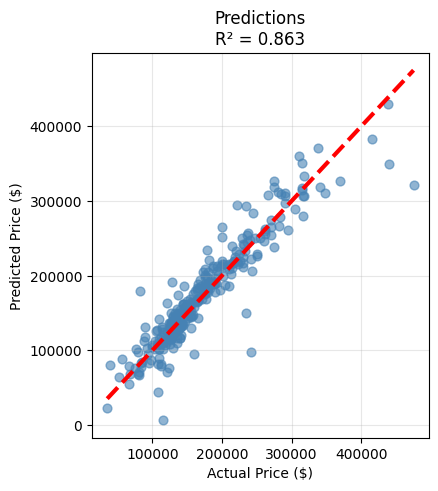

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("HOUSE PRICES PREDICTION - LINEAR REGRESSION")

# 1. DATA LOADING & EXPLORATION
train_df = pd.read_csv('/kaggle/input/d/bahriassia/house-prices-advanced-regression-techniques/train.csv')

print(f"Dataset: {train_df.shape[0]} houses x {train_df.shape[1]} features")
print(f"Price range: ${train_df['SalePrice'].min():,.0f} - ${train_df['SalePrice'].max():,.0f}")
print("\nSample data:")
print(train_df[['MSSubClass', 'LotArea', 'OverallQual', 'SalePrice']].head())

# Missing values before
print(f"\nMissing values: {train_df.isnull().sum().sum()}")

# 2. MISSING VALUES TREATMENT
cols_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual',
    'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'MasVnrType', 'GarageType'
]
for col in cols_none:
    train_df[col] = train_df[col].fillna('None')

train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

print(f"Missing after treatment: {train_df.isnull().sum().sum()}")

# 3. OUTLIER REMOVAL & FEATURE ENGINEERING
print(f"\nRows before outlier removal: {len(train_df)}")
train_df = train_df[train_df['SalePrice'] < 500000]
print(f"Rows after outlier removal: {len(train_df)}")

# Add HouseAge feature
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
print("HouseAge feature added")

# 4. FEATURE PREPARATION
X = pd.get_dummies(train_df.drop('SalePrice', axis=1))
y = train_df['SalePrice']

print(f"Features after encoding: {X.shape[1]}")

# Scale numeric features
scaler = MinMaxScaler()
num_cols = ['LotArea', 'GrLivArea', 'HouseAge']
available_cols = [col for col in num_cols if col in X.columns]
X[available_cols] = scaler.fit_transform(X[available_cols])
print(f"Scaled columns: {available_cols}")

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape[0]} rows | Validation: {X_val.shape[0]} rows")

# 5. MODEL TRAINING
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# 6. RESULTS
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mse)

print("FINAL RESULTS - LINEAR REGRESSION")
print(f"R² Score:     {r2:.4f} ({r2*100:.1f}% variance explained)")
print(f"RMSE:         ${rmse:,.0f} (average error per house)")
print(f"MSE:          ${mse:,.0f}")
print(f"Dataset size: {len(train_df)} houses, {X.shape[1]} features")

# 7. VISUALIZATIONS
plt.figure(figsize=(20, 5))

# Actual vs Predicted
plt.subplot(1, 4, 1)
plt.scatter(y_val, y_pred, alpha=0.6, s=40, color='steelblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=3)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Predictions\nR² = {r2:.3f}')
plt.grid(True, alpha=0.3)

# 8. SUMMARY TABLE
results_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MSE', 'Dataset Size', 'Features Used', 'Outliers Removed'],
    'Value': [f'{r2:.4f}', f'${rmse:,.0f}', f'${mse:,.0f}', len(train_df), X.shape[1], 9],
    'Interpretation': [
        f'{r2*100:.1f}% variance explained',
        f'Average ${rmse:,.0f} error per house',
        'Raw squared error',
        f'{len(train_df)} clean houses',
        f'{X.shape[1]} encoded features',
        'SalePrice > $500k removed'
    ]
})

print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(results_df.to_string(index=False))

print("\nPipeline complete. Ready for model improvements.")
